In [73]:
import pandas as pd
import matplotlib as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import  normalize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [57]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1)
raw_df.fillna(method ='ffill', inplace = True)
print(raw_df.isnull().sum().sum())

0


In [58]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
normalized_df = normalize(scaled_df) 
normalized_df = pd.DataFrame(normalized_df) 

In [59]:
pca = PCA(n_components = 2) 
x1= pca.fit_transform(normalized_df) 
x1 = pd.DataFrame(x1) 
x1.columns = ['p1', 'p2'] 

In [68]:
agg = AgglomerativeClustering(n_clusters=5)
clust_labels=agg.fit_predict(x1)

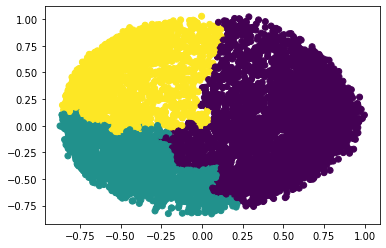

In [67]:
plt.scatter(x1['p1'], x1['p2'], c =clust_labels) 
plt.show() 

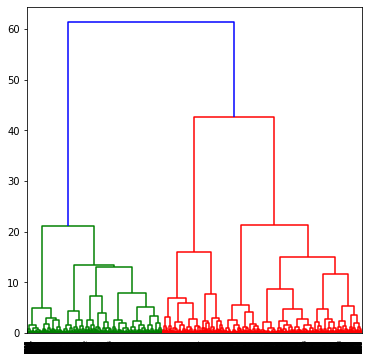

In [55]:
plt.figure(figsize =(6, 6)) 
Dendrogram = shc.dendrogram((shc.linkage(x1, method = "ward")))

In [62]:
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(x1)
kmeans.predict(x1)

array([0, 2, 1, ..., 3, 0, 0], dtype=int32)

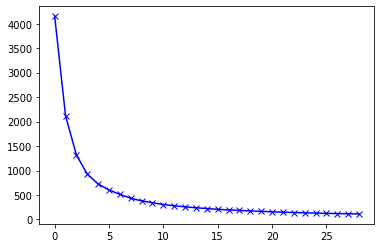

In [63]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(x1)
    cost.append(kmean.inertia_)  
plt.plot(cost, 'bx-')

by using the elbow method the best k value is 3

In [64]:
kmeans=KMeans(n_clusters=3, random_state=0) 
kmeans.fit(x1)
labels = kmeans.predict(x1)

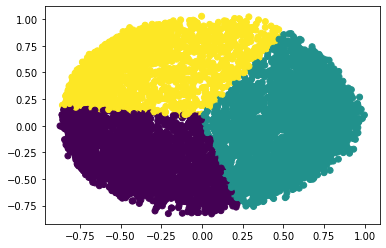

In [65]:
plt.scatter(x1['p1'], x1['p2'], c =labels) 
plt.show() 

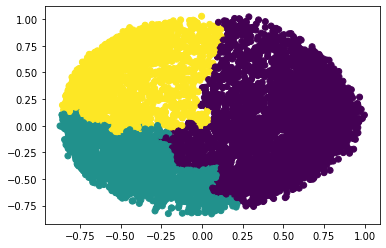

In [71]:
agg = AgglomerativeClustering(n_clusters=3)
clust_labels=agg.fit_predict(x1)
plt.scatter(x1['p1'], x1['p2'], c =clust_labels) 
plt.show() 

In [82]:
print(silhouette_score(x1, AgglomerativeClustering(n_clusters =2).fit_predict(x1))) 

0.4323676789084366


In [81]:
print(silhouette_score(x1, KMeans(n_clusters =3).fit_predict(x1))) 

0.4577050519568398


as we can see the agglomerative clustering model is a little overfitted so the kmeans method is better,
also by using the silhouette method we can see that the kmeans score is slightely higher than the agglomerative clustering score so once again the kmeans is better


to evaluate a clustering algorithm we can also use Dunn index, For a given assignment of clusters, a higher Dunn index indicates better clustering.